## Case Study Presentation
### Subject           - Deep Learning
### Presented by - Ramya Mercy Rajan
### Roll number   - AA.SC.P2MCA2107434

### <span style='font-family:Georgia'> To train the deep learning model, I have used DermaMNIST by MedMNIST; this dataset contains multi-class images of skin lesions taken by dermatoscopy from real-life patients. It has 10000 images with seven classes that could be divided into malignant (Benign keratosis-like lesions, Dermatofibroma, Melanocytic nevi, Vascular lesions) and benign groups(Actinic keratoses and intraepithelial carcinoma, Basal cell carcinoma, Melanoma).

### <span style='font-family:Georgia'> This is a dataset containing multiclass images as (28 x 28) (2D) numpy arrays in the form of an npz file. The images in the dataset have been collected from real life patients via dermascope. The dataset was downloaded from the official website: Available at
#### <https://medmnist.com/>

### <span style='font-family:Georgia'> It is a vast dataset of 10,015 pictures of skin lesions which can be used to identify early stages of skin cancer by  classifying them as malignant or benign. This data set is divided into training, validation and testing dataset; 7007,  1003 and 2005 pictures respectively. I will be building a deep learning neural network which will process an  image and give a prediction output.
### <span style='font-family:Georgia'> Malignant means Cancerous and Benign means Non Cancerous.

![picture](https://drive.google.com/uc?export=view&id=130wWt8lQrPo6wtzndZwr2ZPOquiyXZTA)

In [20]:
#importing all necessary libraries
import numpy as np
import pandas as pd
from numpy import load
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras import layers, models
from matplotlib import pyplot as plt
from keras.layers import BatchNormalization
import keras
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
! pip install -q focal-loss
! pip install -q streamlit
! pip install -q pyngrok

In [22]:
from focal_loss import SparseCategoricalFocalLoss

### <span style='font-family:Georgia'> Loading the Dataset

In [23]:
#mount google drive to import dataset stored in the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!ls "/content/drive/My Drive"


 333.pdf				 Dsc_0141.jpg
'AA.SC.P2MCA2107374-Ramya Mercy Rajan'	 Dsc_0146.jpg
 Classroom				 _DSC1417.JPG
'Colab Notebooks'			'Facial Expression'
 CustomerCopyCL.gdoc			'Family photos '
 cv					'Google AI Studio'
 data					 graph.JPG
'DL Casestudy'				 llm_code.pdf
 Document_Germany.zip			'Major Project Amrita'
 Dsc_0099.jpg				 medminst
 Dsc_0100.jpg				 Mix_1589543423851.mp4
 Dsc_0101.jpg				'My photo.jpg'
 Dsc_0103.jpg				 NLP.ipynb
 Dsc_0105.jpg				'Paragraph Words'
 Dsc_0112.jpg				'Python handbook'
 Dsc_0113.jpg				'Ramya_masters merged file.pdf'
 Dsc_0114.jpg				'Ramya_masters merged.pdf'
 Dsc_0116.jpg				 ramya_newresume.pdf
 Dsc_0117.jpg				 RamyaPTE.pdf
 Dsc_0118.jpg				 RamyaResume_job.pdf
 Dsc_0121.jpg				 rsume
 Dsc_0123.jpg				'Samsung Innovation Campus Project'
 Dsc_0124.jpg				 Scores
 Dsc_0128.jpg				 Screenshot_20210721-112428_YouTube.jpg
 Dsc_0129.jpg				 Screenshot_20210721-113414_YouTube.jpg
 Dsc_0130.jpg				'Shopping Bills'
 Dsc_0131.jpg				 txt_sentoken
 Dsc_013

In [25]:
import os

# Path to your medmnist folder
path = "/content/drive/My Drive/medminst"

# Change working directory
os.chdir(path)

# Verify files inside
print(os.listdir(path))


['dermamnist.npz', 'AA_SC_P2MCA2107434_DL_CaseStudy.ipynb']


In [26]:
import numpy as np

data = np.load("dermamnist.npz")

print("Keys inside NPZ:", data.files)


Keys inside NPZ: ['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


### <span style='font-family:Georgia'> Dataset is split up into training, validation and testing sets respectively for X and Y
### <span style='font-family:Georgia'> The dataset was split into 70% ,10% and 20% for training validation and testing.

In [27]:

X_train, y_train = data['train_images'], data['train_labels']
X_val, y_val = data['val_images'], data['val_labels']
X_test, y_test = data['test_images'], data['test_labels']

print("Train dataset:        ", X_train.shape, y_train.shape)
print("Validation dataset:   ", X_val.shape, y_val.shape)
print("Test dataset:         ", X_test.shape, y_test.shape)

Train dataset:         (7007, 28, 28, 3) (7007, 1)
Validation dataset:    (1003, 28, 28, 3) (1003, 1)
Test dataset:          (2005, 28, 28, 3) (2005, 1)


You can concatenate your arrays row-wise:

In [28]:
X = np.concatenate((X_train, X_val, X_test), axis=0)
y = np.concatenate((y_train, y_val, y_test), axis=0)

### <span style='font-family:Georgia'> This data set is divided into training, validation and testing dataset; 7007, 1003 and 2005 pictures respectively.

In [29]:
y_train, y_val, y_test = y_train.reshape(-1), y_val.reshape(-1), y_test.reshape(-1)

print(y_val.shape, y_test.shape, y_train.shape)
X_val.shape, X_test.shape, X_train.shape

(1003,) (2005,) (7007,)


((1003, 28, 28, 3), (2005, 28, 28, 3), (7007, 28, 28, 3))

### <span style='font-family:Georgia'> Scaling is done on the data so that the DL network can work efficiently

In [30]:

X_val, X_test, X_train = X_val/255, X_test/255, X_train/255

### <span style='font-family:Georgia'> Exploratory Data Analysis

#### <span style='font-family:Georgia'> Checking the Classes. There are 7 classes

In [31]:
np.unique(data['test_labels'])

array([0, 1, 2, 3, 4, 5, 6], dtype=uint8)

#### <span style='font-family:Georgia'> Actinic keratoses and intraepithelial carcinoma, Basal cell carcinoma, Benign keratosis-like lesions, Dermatofibroma, Melanoma, Melanocytic nevi, Vascular lesions

In [32]:
labels = ['akiec',
          'bcc',
          'bkl',
          'df',
          'nv',
          'vasc',
          'mel']

In [33]:
classes = []
for i in range(len(labels)):
  classes.append(len(np.where(y==i)[0]))

classes_df = pd.DataFrame(classes,index=labels, columns = ['Count'])

#### <span style='font-family:Georgia'> Visualize the distribution of the images in the dataset according to classes and noticed the imbalanced class

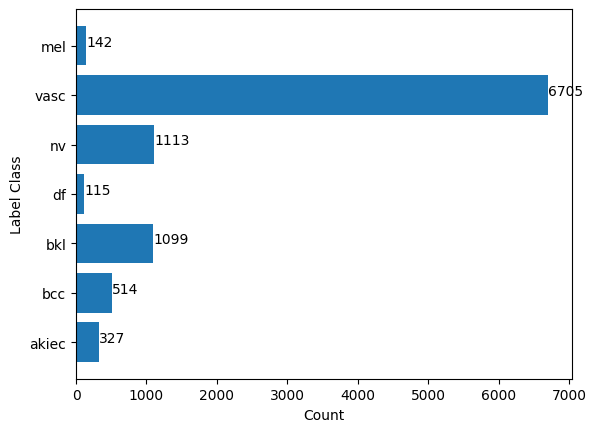

In [34]:
x = classes_df.index
y = classes_df.Count
plt.barh(x, y)
plt.xlabel('Count')
plt.ylabel('Label Class')
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.show()

#### <span style='font-family:Georgia'> ``Focal Loss - Unbalanced data`` like what I have here can cause some problems to the model learning procedure. To address this  problem, I have used a new loss function named focal loss. ``With the focal loss, we add a modulating factor multiplied  by the Cross-Entropy Loss.`` By this modulating factor, when a sample is misclassified, p is low and modulating factor is  near one, so the loss is unaffected. But as p increases, the modulating factor approaches 0, and the loss for wellclassified examples is down-weighted.



![picture](https://drive.google.com/uc?export=view&id=1nxKtfBV7TGsk7f6pUvXZYQpr7aDlGuFy)

#### <span style='font-family:Georgia'> Get an overview of the images that I would be dealing with by viewing them in a grid divided by classes

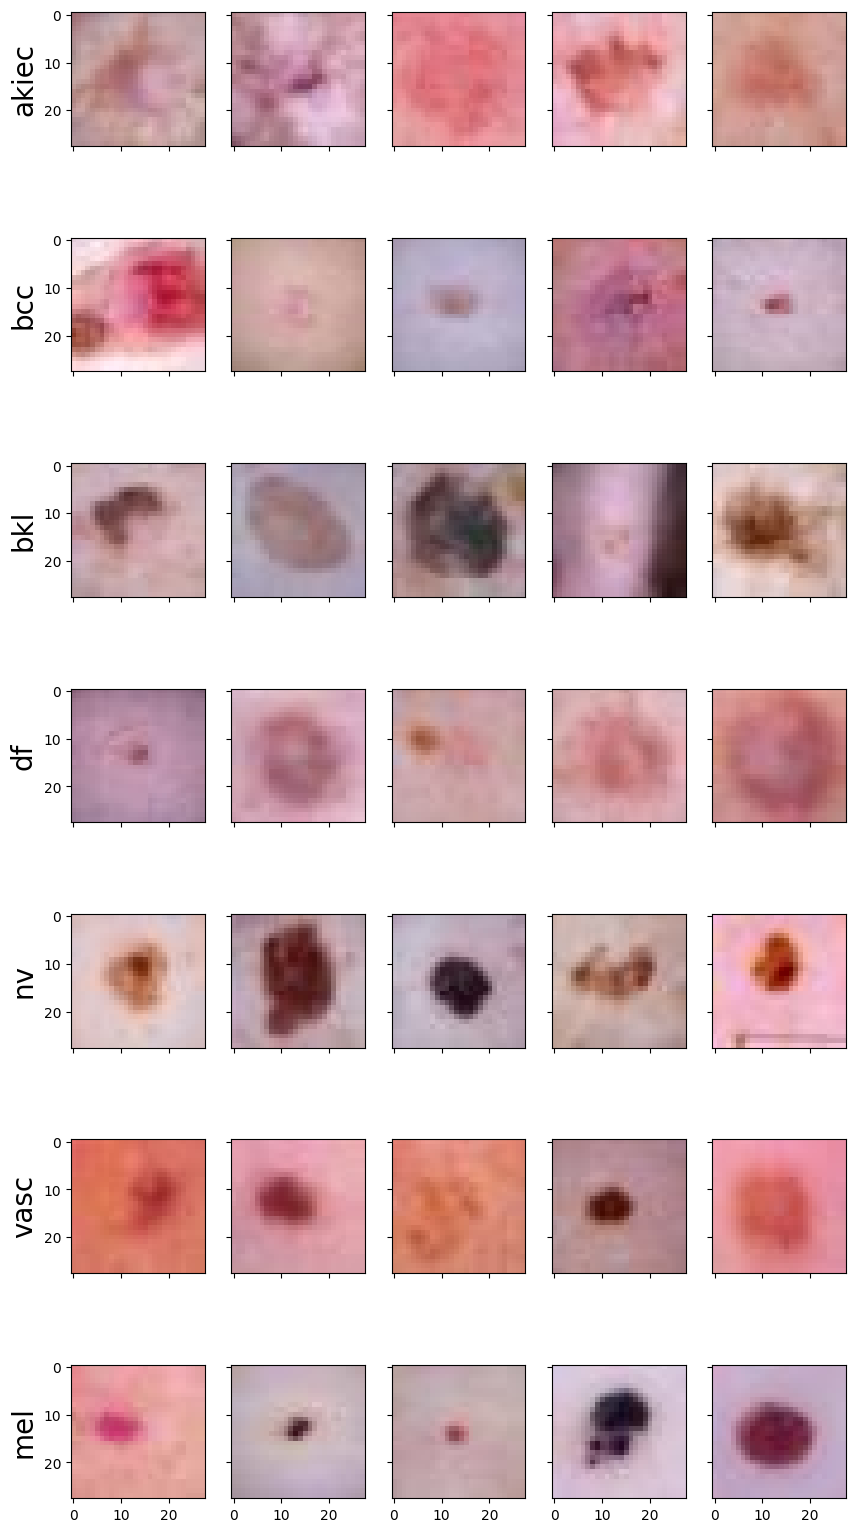

In [35]:
fig, ax = plt.subplots(7, 5)
fig.set_figheight(20)
fig.set_figwidth(10)
for classes in range (7):
  for i, inx in enumerate(np.where(y_train==classes)[0][:5]):
    ax[classes,i].imshow(X_train[inx])
    ax[classes,i].set_ylabel(labels[classes],fontsize = 20.0)
    ax[classes,i].label_outer()

### <span style='font-family:Georgia'> Model Creation & Training

#### <span style='font-family:Georgia'> Sequential model with different types of layers and activation function


In [36]:
model = models.Sequential()

model.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,3)))
model.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### <span style='font-family:Georgia'> Hyperparameters used to train the model.The model is trained with a low learning rate which will ensure that the model is able to learn optimally by globally setting suitable weights. This will take longer to train but it will produce better results than if the learning rate is high.

In [37]:
batch_size = 128
no_epochs = 300
learn_rate = 0.00013

#### <span style='font-family:Georgia'> Optimizer for the model. Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.

In [39]:
from tensorflow.keras.optimizers import Adam

learn_rate = 0.00013
my_optimizer = Adam(learning_rate=learn_rate)


#### <span style='font-family:Georgia'> Summary of the Model Created

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 126,487 (494.09 KB)

 Trainable params: 126,263 (493.21 KB)

 Non-trainable params: 224 (896.00 B)

#### <span style='font-family:Georgia'> Visualize the Model created with layer flow

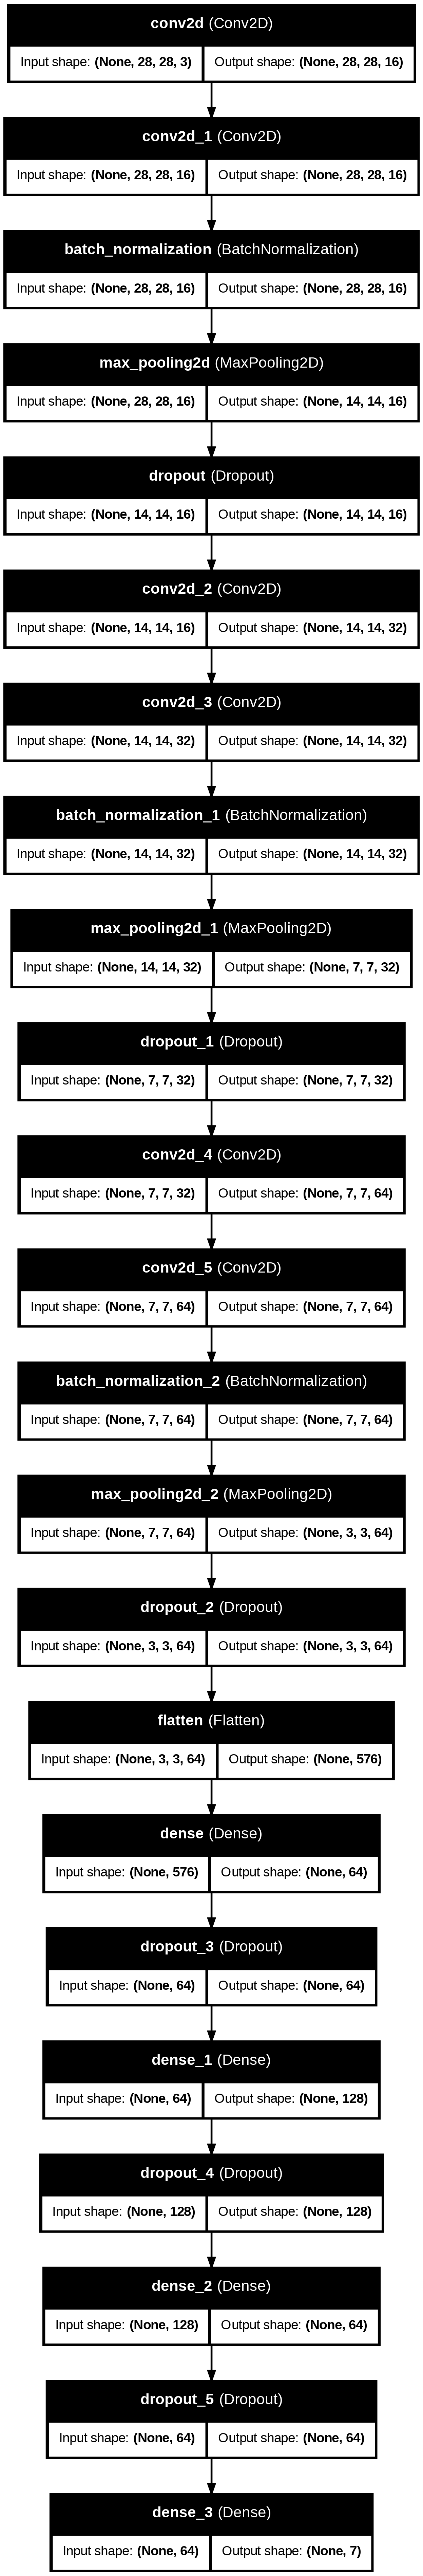

In [41]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### <span style='font-family:Georgia'> Define a ``class that would be used to stop the model training when we reach a certain rate of validation accuracy``

#### <span style='font-family:Georgia'> ``The model will be trained with an optimum number of epochs to achieve a high accuracy.`` The epochs determine  the number of times the dataset will run through the CNN to train. ``If there are way too many epochs it could  result in overfitting hence it is best to use an optimal number of epochs with early stopping call back function  which will stop the training once the model performance stops improving`` on a hold out validation dataset.

In [42]:
class StopOnPoint(tf.keras.callbacks.Callback):
    def __init__(self, point):
        super(StopOnPoint, self).__init__()
        self.point = point

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs["val_accuracy"]
        if accuracy >= self.point:
            self.model.stop_training = True

#set the stopping accuracy to 0.78 (which is the highest seen accuracy during training of the model)
callbacks = [StopOnPoint(0.78)] # <- set optimal point

#### <span style='font-family:Georgia'> ``The model performed better with focal loss function which could assist in tackling the issue faced by the  imbalanced dataset.`` Optimizers are functions that are used to modify the attributes such as weights and learning  rate of a neural network. This assists in reducing the overall loss and improves the accuracy.

#### <span style='font-family:Georgia'> Compile the model with Focal Loss function - gamma = 2

In [43]:
model.compile(loss=SparseCategoricalFocalLoss(gamma=2),
              optimizer=my_optimizer,
              metrics=['accuracy'])

#### <span style='font-family:Georgia'> Fit the model with stopping function defined before

In [44]:
summary = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks=[callbacks])

Epoch 1/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.1996 - loss: 2.0563 - val_accuracy: 0.1107 - val_loss: 1.3847
Epoch 2/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5724 - loss: 0.8748 - val_accuracy: 0.1107 - val_loss: 1.3033
Epoch 3/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6056 - loss: 0.7510 - val_accuracy: 0.1107 - val_loss: 1.1948
Epoch 4/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6179 - loss: 0.7121 - val_accuracy: 0.1107 - val_loss: 1.0805
Epoch 5/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6301 - loss: 0.6968 - val_accuracy: 0.2064 - val_loss: 0.9696
Epoch 6/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6316 - loss: 0.6691 - val_accuracy: 0.6600 - val_loss: 0.8437
Epoch 7/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6429 - loss: 0.6576 - val_accuracy: 0.6690 - val_loss: 0.7813
Epoch 8/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6470 - loss: 0.6299 - val_accuracy: 0.6

#### <span style='font-family:Georgia'> Save the model to our drive

In [45]:
tf.keras.models.save_model(model,'SkinSavior_model.hdf5')

#### <span style='font-family:Georgia'> Model Evaluation. Visualize the training vs the validation accuracy of the model

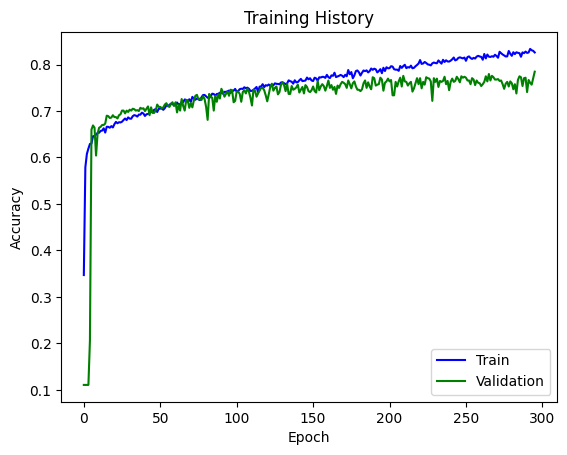

In [46]:
#visualize the training vs the validation accuracy of the model
plt.plot(summary.history['accuracy'], c="b")
plt.plot(summary.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [47]:
#check the testing loss and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.3882964551448822 / Test accuracy: 0.7695760726928711


#### <span style='font-family:Georgia'> Classification report showing precision, recall and F1 score of all classes with overall accuracy

In [48]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_test, y_pred_classes))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

           0       0.51      0.52      0.51        66
           1       0.51      0.58      0.55       103
           2       0.53      0.49      0.51       220
           3       0.55      0.48      0.51        23
           4       0.64      0.27      0.38       223
           5       0.85      0.93      0.89      1341
           6       0.74      0.69      0.71        29

    accuracy                           0.77      2005
   macro avg       0.62      0.57      0.58      2005
weighted avg       0.76      0.77      0.75      2005



#### <span style='font-family:Georgia'> The model was trained rigorously to ensure that I achieved the highest possible accuracy. I used an early  stopping function with a callback to stop model training when the highest possible accuracy had been attained. ``In  a medical data problem, accuracy is not the only important metric that needs to be evaluated.``

#### <span style='font-family:Georgia'> ``The precision and recall of the model is of equal importance, hence I had to ensure that the precision, recall and  F1 score of all classes were not zero. After multiple attempts I achieved an accuracy of 77% with a decent  precision and recall for all classes.``

#### <span style='font-family:Georgia'> Previously, I was not able to get precision and recall more than zero for the classes with less images. After  attempting with focal loss we achieved a better figure.

# Web Application Deployment